In [1]:
# Necessary Dependencies
import os 
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as img 
from glob import glob
import shutil
from pathlib import Path
import cv2
from random import shuffle
from tqdm import tqdm


print('Started')

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Started


## Multi-Chest Xray Dataset

https://www.kaggle.com/jbeltranleon/datasets

This dataset contains 9 different classes: mass,cardiomegaly, atelectasis, effusion, pneumothorax, no_finding, nodule, and infiltration'

In [10]:
TRAIN_DIR = '/Users/ryanjoseph/Desktop/Yale/Repositories/Pneumonia/Multi_Chest/Data/chest_xray/train/'
TEST_DIR = '/Users/ryanjoseph/Desktop/Yale/Repositories/Pneumonia/Multi_Chest/Data/chest_xray/test/'
VAL_DIR = '/Users/ryanjoseph/Desktop/Yale/Repositories/Pneumonia/Multi_Chest/Data/chest_xray/val/'


In [29]:
# There are 2 Disease Classes in Each directory
DISEASES = ['PNEUMONIA', 'NORMAL']

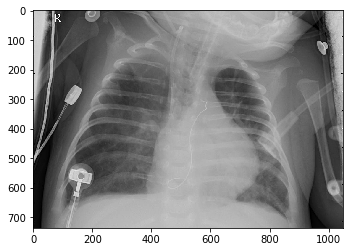

(736, 1048)
[[210 208 206 ... 213 215 216]
 [210 208 206 ... 213 216 217]
 [210 208 205 ... 213 216 218]
 ...
 [ 16  15  14 ...  47  47  47]
 [ 16  15  14 ...  46  46  46]
 [ 16  15  14 ...  46  46  46]]


In [19]:
# Attempting to create a Smaller Dataset 
# Make it balanced by only using some of the Normal cases and using all the Pneumonia Cases

for category in diseases:  # do dogs and cats
    path = os.path.join(TRAIN_DIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        print(img_array.shape)
        print(img_array)

        break  
    break  

In [37]:
data = []
IMG_SIZE = 50 


def create_train_data(IMG_SIZE):
    print('IMG SIZE: ', IMG_SIZE)
    for disease in DISEASES:
        path = os.path.join(TRAIN_DIR, disease)
        class_hot = DISEASES.index(disease)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                pass
        
            
create_train_data(IMG_SIZE)
print(len(data))

  0%|          | 19/3875 [00:00<00:21, 182.49it/s]

IMG SIZE:  50


  0%|          | 4/1341 [00:00<00:36, 37.00it/s]

IMG SIZE:  50


100%|██████████| 1341/1341 [00:23<00:00, 57.31it/s]

0


[]

In [17]:
def class_imbalance(dire):  
    disease_class = []
    Number = []
    list = os.listdir(dire)
    for i in list:
        if i =='.DS_Store':
            pass
        else:
            #print('Disease Class: ', i)
            disease_class.append(i)
            new = os.listdir(dire + i)
            number_files = len(new)
            Number.append(number_files)
            #print ('NUMBER OF FILES: ', number_files)
        
    df = pd.DataFrame(Number, disease_class)
    
    fig, ax1 = plt.subplots(1,1,figsize=(20,10))

    df.plot(kind="bar", ax=ax1, title="Disease Class Imbalance - Test Folder")
    print(df)
    
    del df

              0
PNEUMONIA  3875
NORMAL     1341


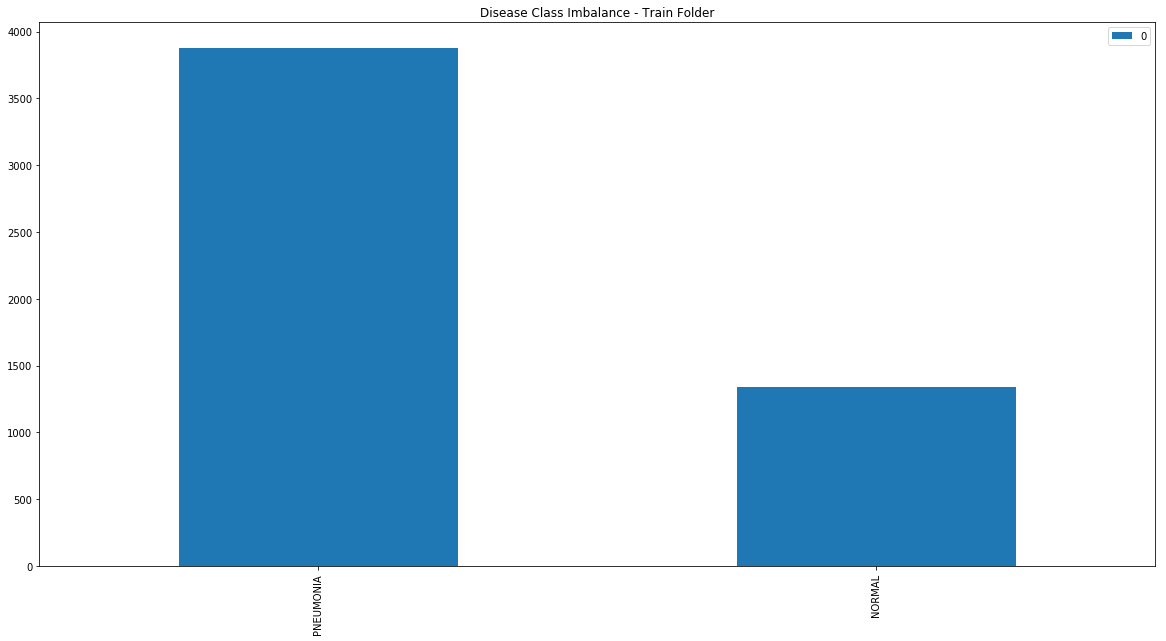

In [16]:
class_imbalance(TRAIN_DIR)

             0
PNEUMONIA  390
NORMAL     234


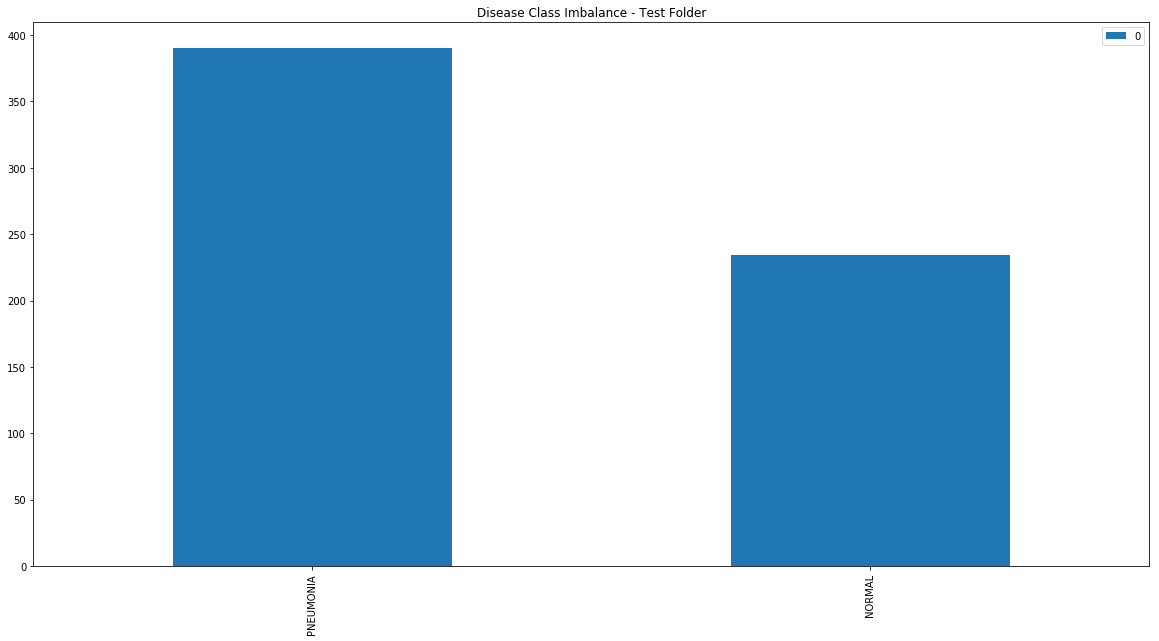

In [18]:
class_imbalance(TEST_DIR)

             0
PNEUMONIA  390
NORMAL     234


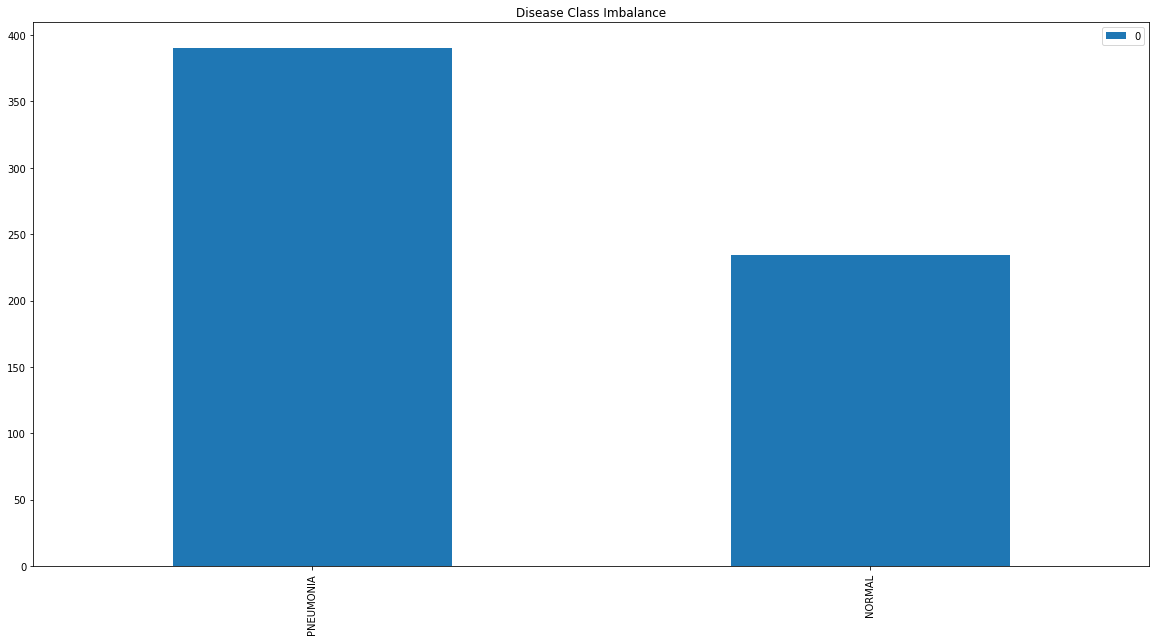

In [14]:
class_imbalance(TEST_DIR)

In [11]:
# Fast Visualization function
def quick_view(disease_type):
    mass_dir = TRAIN_DIR + disease_type + '/'
    mass_num = os.listdir(mass_dir)
    mass_num_1 = mass_dir + mass_num[3]
    print(f'Disease Class: {disease_type}')
    img2 = img.imread(mass_num_1)
    print('Image Shape: ', img2.shape)
    fig, ax1 = plt.subplots(1,1,figsize=(20,10))
    plt.imshow(img2)

## NORMAL

Disease Class: NORMAL
Image Shape:  (1495, 1854)


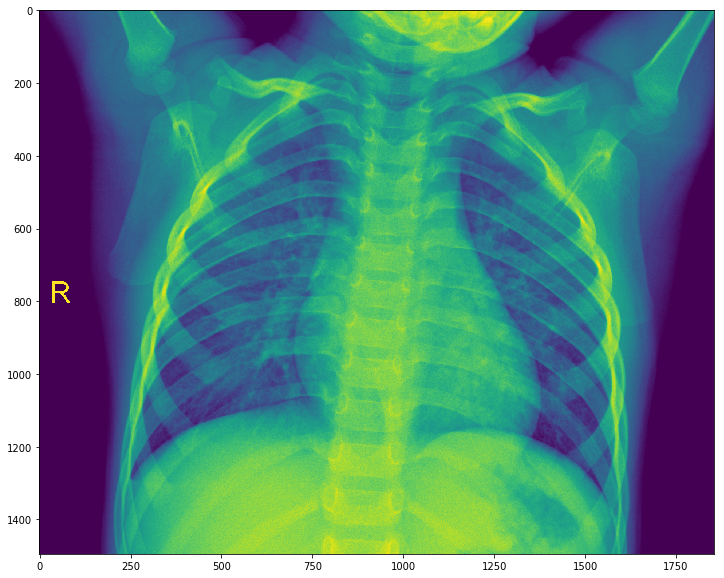

In [12]:
disease_type = 'NORMAL'
quick_view(disease_type)

## Pneumonia

Disease Class: PNEUMONIA
Image Shape:  (888, 1224)


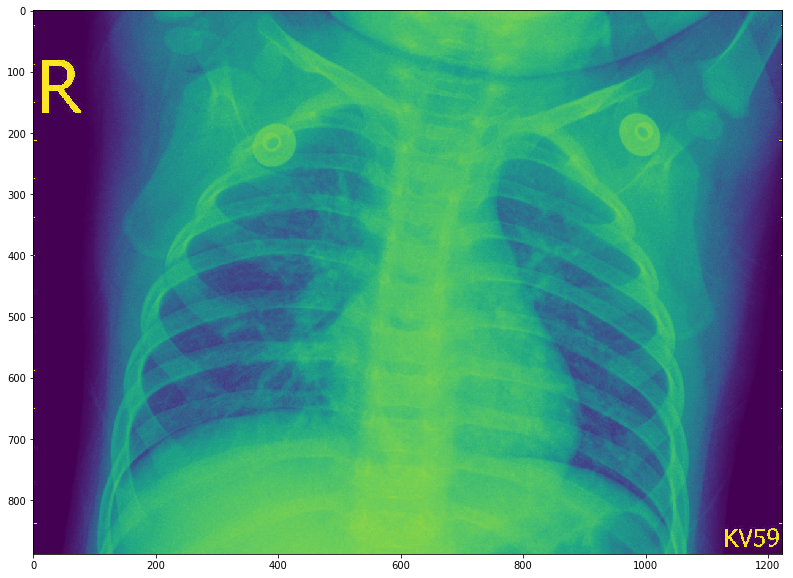

In [13]:
disease_type = 'PNEUMONIA'
quick_view(disease_type)

In [ ]:
data_dir = Path(TRAIN_DIR)
train_dir = data_dir / 'train'
normal_cases_dir = train_dir / 'NORMAL'

pneumonia_cases_dir = train_dir / 'PNEUMONIA'

normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

